# Introduction


**Name : Kevin Giovanni Pradana**

**Batch : 008**

**Algoirthm/Model : Artificial Neural Network**

**Objectives :**

* Able to understand Artifical Neural Network concept
* Able to prepare data for Artificial Neural Network
* Able to implement Artificial Neural Network with given data
* Able to explain model result 


# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sys

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# oversampling
from imblearn.over_sampling import SMOTE

%matplotlib inline

import sklearn
import tensorflow as tf
import os
import warnings

#tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense 
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam



# Data Loading

Telcom Customer Churn

Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.

* customerID : Customer ID
* gender : Whether the customer is a male or a female
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* honeService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn : Whether the customer churned or not (Yes or No)

Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading data
data = pd.read_csv('/content/drive/MyDrive/Data/Copy of WA_Fn-UseC_-Telco-Customer-Churn.csv')

Show Data top 5 data by default

In [4]:
#show top 5 data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#show columns available
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#show dimension of dataset
data.shape

(7043, 21)

In [7]:
#show dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [8]:
#checking whether is there any missing values in dataset
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

from above information, we can say that there is no missing values in dataset but let's take a look further 

In [9]:
#drop unwanted column
df = data.drop(columns = ['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


customerID dropped because every records of data has unique id and we can't use id to predict customer churn

as we can see above in df.info() command, totalcharges is numerical data but has wrong data type which is object. so here i will change the data type and check if there is any missing values

In [10]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

we can see there are 11 missing values but we can't see it clearly.

because of that i tried to convert the data into nan and drop it since 11 rows is a small percentage compare to 7000 rows

In [11]:
#change space ' ' value to nan
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [12]:
#drop missing values
df.dropna(inplace=True)

In [13]:
#change datatype into float
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [14]:
#check dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


totalcharges data types has been changed into float from object

# Exploratory Data Analysis

### Target Variable

No     5163
Yes    1869
Name: Churn, dtype: int64

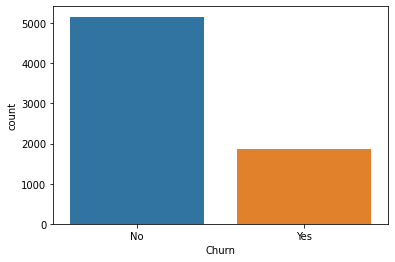

In [15]:
# we want to see is the label balance or not
sns.countplot(x = "Churn", data = df)
df.loc[:, 'Churn'].value_counts()

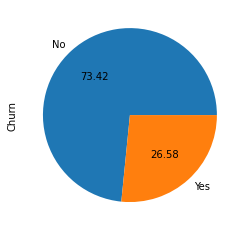

In [16]:
df['Churn'].value_counts().plot.pie(autopct='%.2f')

according to above chart, there are more people who are not churn than churn. people who are not going/willing to churn is more than twice the one who churn

Here, we are trying to predict if the client left the company in the previous month and there are only two option possible "yes" and "no". Therefore we have binary classification problem with slightly imbalance target :
* churn : No - 73.46%
* churn : yes - 26.54%   

### Features

#### Numerical Features

##### Senior Citizen

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

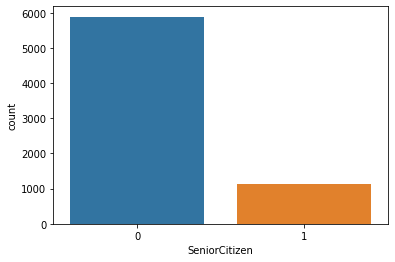

In [17]:
sns.countplot(x = 'SeniorCitizen', data = df)
df.loc[:, 'SeniorCitizen'].value_counts()

there more younger citizen than senior one with the younger people almost six times more than senior citizen

**there are three more numerical features but all of them are density type and we can see the density using kdeplot which is seaborn function**

In [18]:
def kdeplot(feature) :
  plt.figure(figsize=(9,4))
  plt.title("KDE plot for {}".format(feature))
  ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
  ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
  plt.legend(loc = "upper right")

##### Tenure

i want to take a look at tenure feature to see if length of tenure affecting people to churn

In [19]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


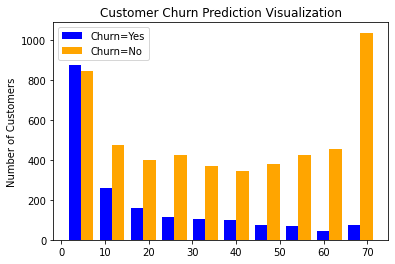

In [20]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure


plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['blue','orange'], label=['Churn=Yes','Churn=No'])
plt.legend()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

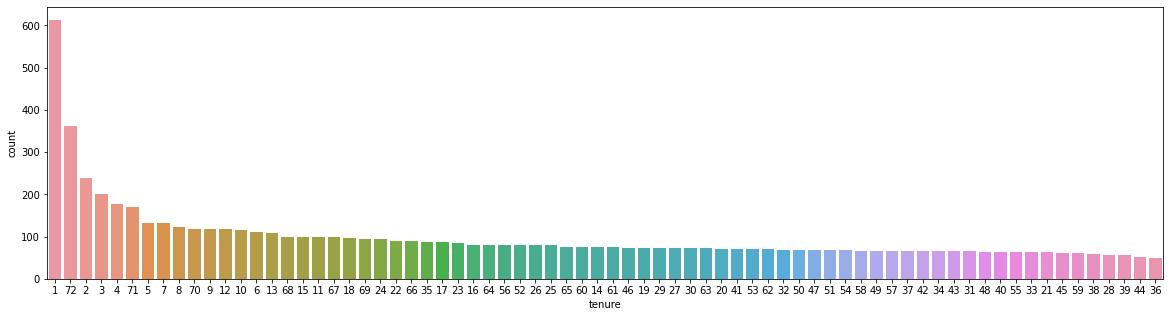

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'tenure', data = df, order=df['tenure'].value_counts().sort_values(ascending=False).index)
df.loc[:, 'tenure'].value_counts()

we  can see people tend to churn with lows tenure or going all the way with the highest tenure possible

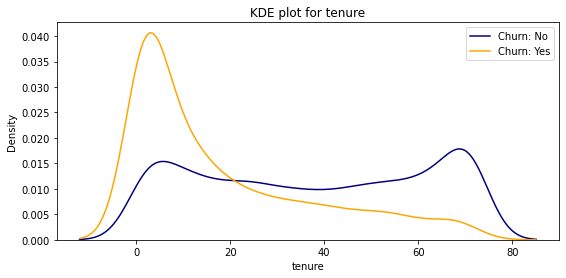

In [22]:
kdeplot('tenure')

people with less tenure tend to churn more than high tenure

##### MonthlyCharges

In [23]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


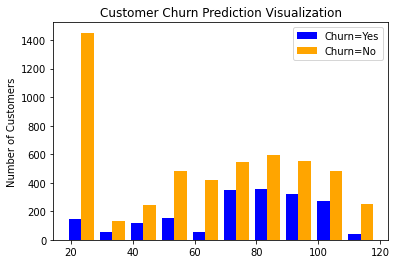

In [24]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges


plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([mc_churn_yes, mc_churn_no], color=['blue','orange'], label=['Churn=Yes','Churn=No'])
plt.legend()

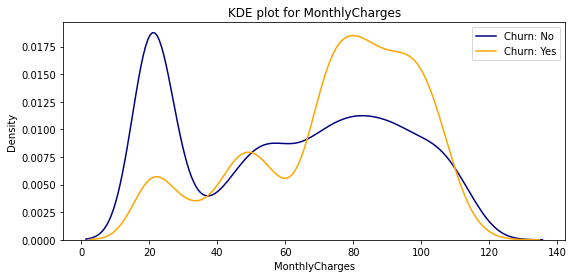

In [25]:
kdeplot('MonthlyCharges')

the higher monthly charges get, customer more likely to churn than the lower one

##### TotalCharges

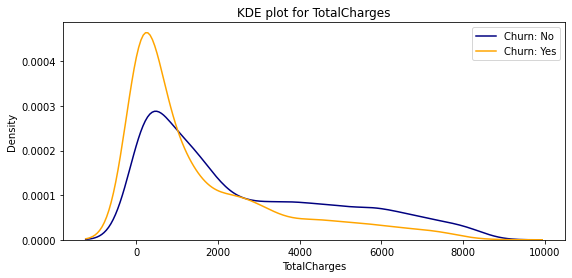

In [26]:
kdeplot('TotalCharges')

From the plots above we can conclue that:

* Clients with higher MonthlyCharges are also more likely to churn
* Tenure and MonthlyCharges are probably important features that affects people to churn

#### Categorical Features

above dataset has 16 categorical features:

* Six binary features (Yes/No)
* Nine features with three unique values each (categories)
* One feature with four unique values

##### Phone Service

Yes    6352
No      680
Name: PhoneService, dtype: int64

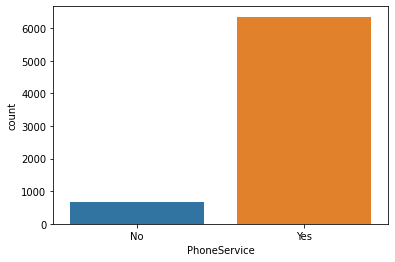

In [27]:
sns.countplot(x = 'PhoneService', data = df)
df.loc[:, 'PhoneService'].value_counts()

since most people already have phone dial in their house since a long time ago so i assume that's the reason people have phone service no matter they use it or not

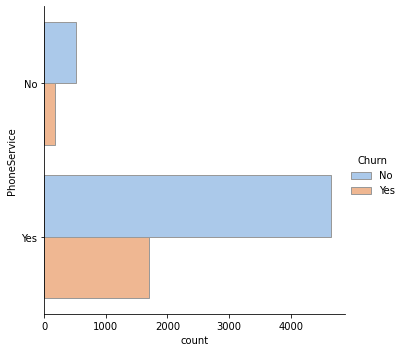

In [28]:
sns.catplot(y="PhoneService", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.show()  

* Few customers doesn't have phone service
* people with phone service tend to churn more than the one who don't

##### Internet Service

In [29]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

each internetservice category has their own market, but if the marketing team want to approach customer who more likely to churn they can offer deals or product to people who use fiber optic

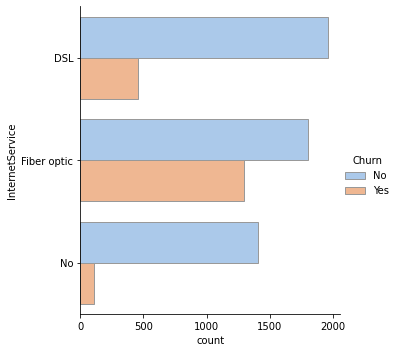

In [30]:
sns.catplot(y="InternetService", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.show()  

if we compare between each type of internet service by churn status we can see that people with fiber optic internet service are more likely to churn and the people with no internet service are more unlikely to churn 
for the marketing team, they can avoid to sell internets product to them and focus on phone service only 

##### Additional Services

there are six additional services such as : 
* OnlineSecurity 
* OnlineBackup  
* DeviceProtection 
* TechSupport 
* StreamingTV 
* StreamingMovies

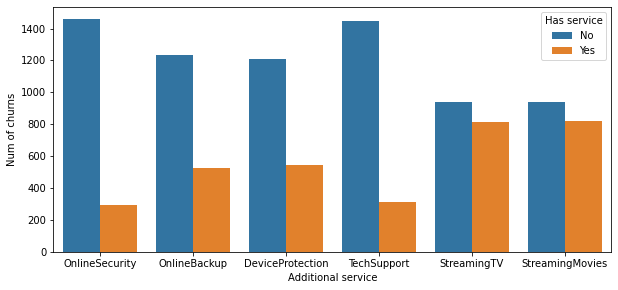

In [31]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
plt.figure(figsize=(10, 4.5))
df_additional = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df_additional = pd.melt(df_additional[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df_additional, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

the plot shows number of clients that churn by additional service. We can see that :    
* Customers with who use streaming services are more likely to churn with about 800 customer who said yes to the service
* Streaming service is not predictive for churn

##### Contract and Payment


Payment method

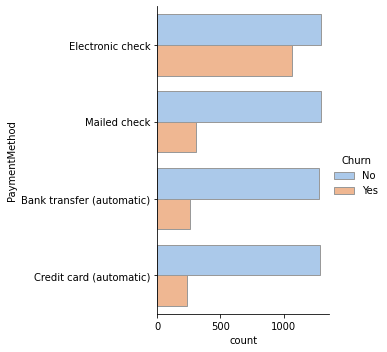

In [32]:
sns.catplot(y="PaymentMethod", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.show()  

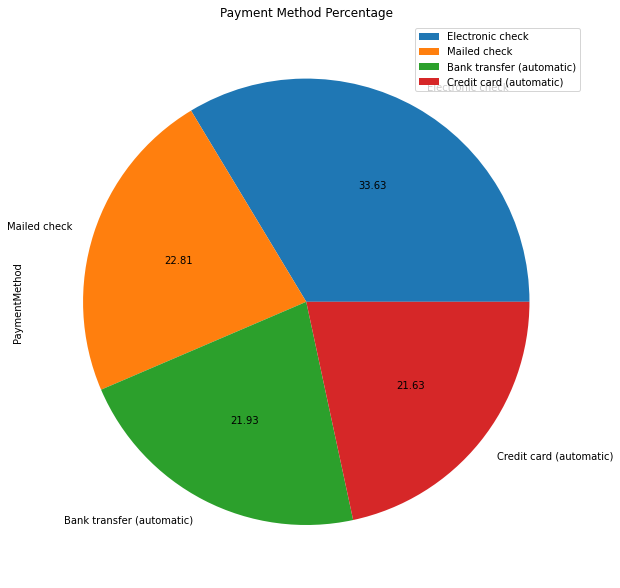

In [33]:
plt.figure(figsize = (10,20))
df['PaymentMethod'].value_counts().plot.pie(autopct='%.2f',title = 'Payment Method Percentage')
plt.legend()

majority of market (data) is dominated by people who use electronic check and they tend to churn more than others

visualize contract

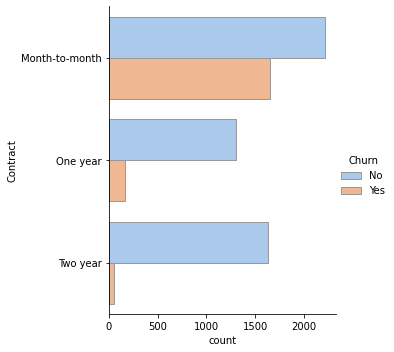

In [34]:
sns.catplot(y="Contract", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.show()  

A few observations :

* The preferred payment method is Electronic check with around 33% of customers. This method also has a very high churn rate
* Short term contracts have higher churn rates
* One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn


#### Combining Categorical and Numerical features

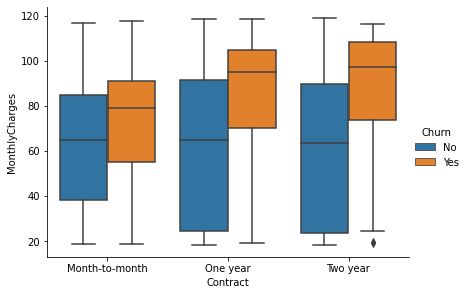

In [35]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

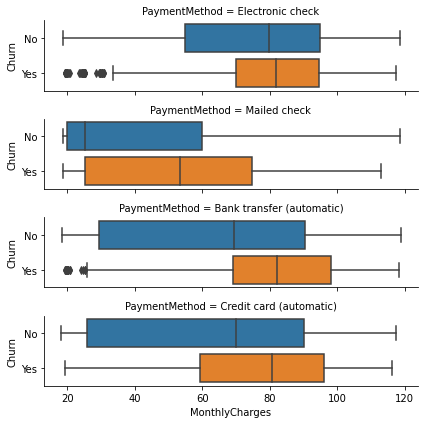

In [36]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

* Longer contracts are more affected by higher monthly charges (for churn rate), so people preferred at least one year contract or more
* Mailed checks have lower charges than other payment method
* There is a big gap in charges between customers that churn and those that don't with respect to Mailed Check

#### Correlation

In [37]:
#showing data for further visualizations
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


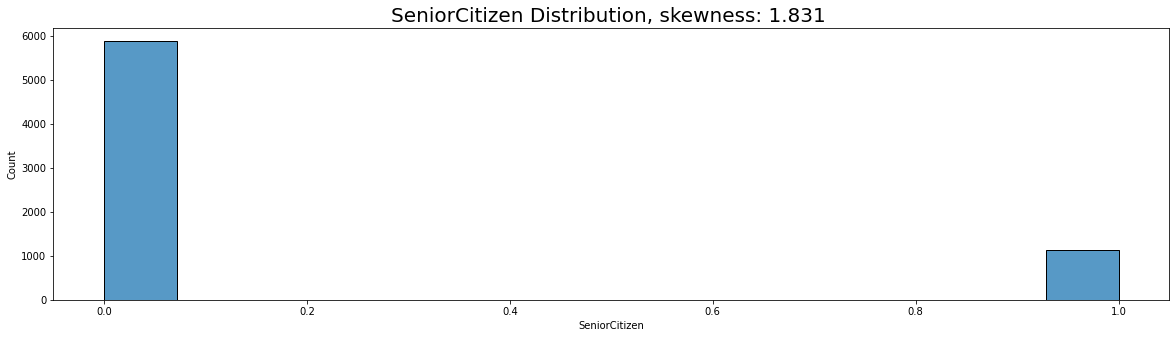

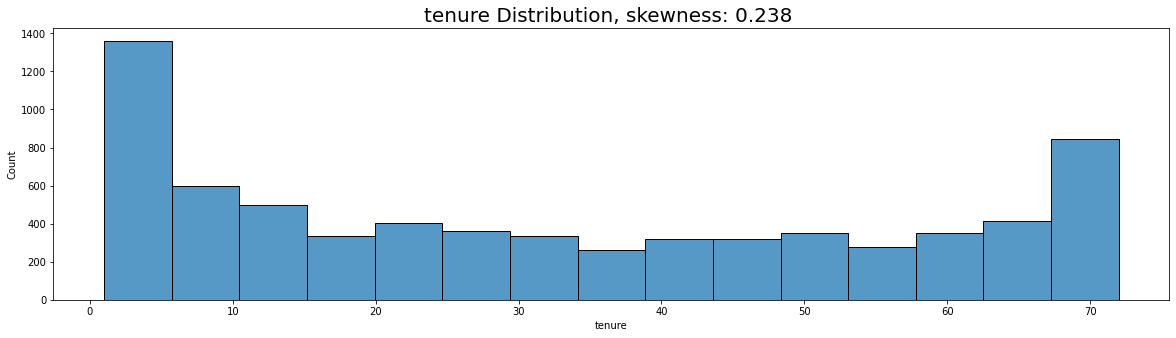

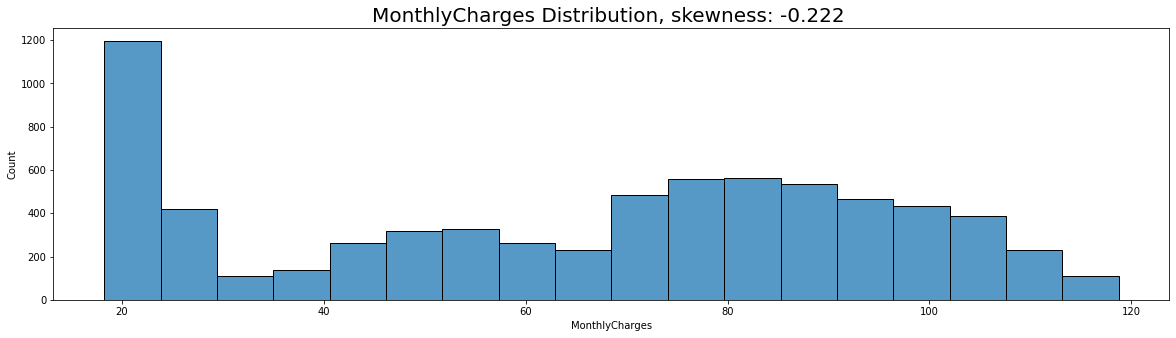

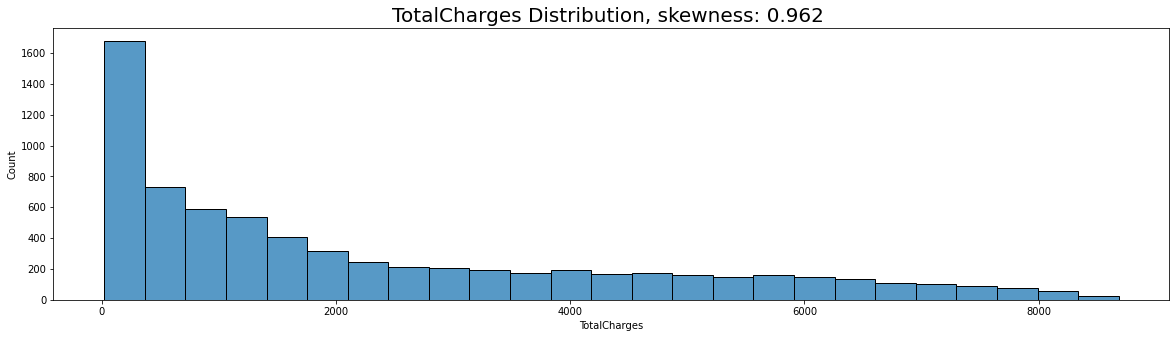

In [38]:
#check skewness
for col in df.select_dtypes('number').columns:
    plt.figure(figsize=(20,5))
    plt.title('{} Distribution, skewness: {} '.format(col,str(round(df[col].skew(), 3))), fontsize=20)
    sns.histplot(df[col])
    plt.show()

most of numerical data are skewed but since neural network not really sensitive to outlier, so i just keep it the way it is

In [39]:
#use vif to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
#check multicolinearity
vif = pd.DataFrame()
vif["features"] = df.select_dtypes("number").columns
vif["VIF"] = [variance_inflation_factor(df.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,SeniorCitizen,1.257569
1,tenure,6.332737
2,MonthlyCharges,3.701617
3,TotalCharges,8.085198


based on this resource https://quantifyinghealth.com/vif-threshold/ Most research papers consider a VIF (Variance Inflation Factor) > 10 as an indicator of multicollinearity

# Data Preprocessing

In [41]:
#copy dataset
dc = df.copy()

In [42]:
#function to return unique value in each features
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [43]:
#use unique value function
print_unique_col_values(dc)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [44]:
#i assume no internet service = No, so i change it to No instead of dropping it
dc.replace('No internet service', 'No', inplace=True)
dc.replace('No phone service', 'No', inplace=True)

In [45]:
#check the data again
print_unique_col_values(dc)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [46]:
# make a list containing columns with binary value
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',  'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',  'PaperlessBilling', 'Churn']

##### Binary Classification Label Encoding

In [47]:
#change binary value yes and no to 1 and 0
for col in yes_no_columns:
  dc[col].replace({'Yes': 1, 'No': 0},inplace=True)

In [48]:
# change gender to female 1 male 0
dc['gender'].replace({'Female':1,'Male':0},inplace=True)

In [49]:
# check columns with categorical value more than 2
print_unique_col_values(dc)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


#### One Hot Encoding

In [50]:
#use one hot encoding
dc = pd.get_dummies(data=dc,columns=['InternetService','Contract', 'PaymentMethod'])
dc.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

##### Define features and labels

In [51]:
X = dc.drop(columns = ["Churn"]) # features
y = dc["Churn"] # target label

In [52]:
#check features data shape
X.shape

(7032, 26)

In [53]:
#check target shape
y.shape

(7032,)

##### Splitting Data

In [54]:
#split data train and test
X_train_main, X_test, y_train_main, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 77)

In [55]:
#check train data shape
X_train_main.shape, y_train_main.shape

((4922, 26), (4922,))

In [56]:
#check test data shape
X_test.shape, y_test.shape

((2110, 26), (2110,))

In [57]:
#split data with validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_main, y_train_main, test_size = 0.3, random_state = 77)

##### Scaling and Oversampling


In [58]:
# using pipeline
scaler_pipeline = Pipeline([('minmax_scaler', MinMaxScaler())])

In [59]:
#use pipline for scalling
scaler_pipeline.fit(X_train)

X_train = scaler_pipeline.transform(X_train)
X_test_trf = scaler_pipeline.transform(X_test)
X_val_trf = scaler_pipeline.transform(X_val)

In [60]:
#do oversampling
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [61]:
#check whether target data already balanced
y_res.value_counts()

0    2520
1    2520
Name: Churn, dtype: int64

# Model Definition, Training, Evaluation and Improvement

## Sequential Model

In [62]:
tf.keras.backend.clear_session() #use for avoiding clutter from old models and layers
np.random.seed(77)
tf.random.set_seed(77)

##### Define Model

In [63]:
#create base model with hidden layers
model = keras.models.Sequential([
    keras.layers.Dense(26, input_shape=(26,)), #input shape based on columns number
    
    keras.layers.Dense(20, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    
    keras.layers.Dense(10, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    
    keras.layers.Dense(5, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

     keras.layers.Dense(1, activation="sigmoid")
])


Summary :
* 1 input layer
* 3 hidden layer with different amount of neuron 20, 10, and 5. for initializer = glorot_uniform, activation = relu
* 1 output layer, because the label is binary classification ( 1 or 0)

In [64]:
#check model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 20)                540       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                        

In [65]:
#compile base model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy', 'Recall'])

### Model Training Base Model

In [66]:
#train model
history = model.fit(X_res, y_res, epochs=100, validation_data=(X_val_trf, y_val))

Epoch 1/100
158/158 [==============================] - 5s 10ms/step - loss: 0.5943 - Accuracy: 0.7109 - recall: 0.7278 - val_loss: 0.5151 - val_Accuracy: 0.7068 - val_recall: 0.8120
Epoch 2/100
158/158 [==============================] - 1s 6ms/step - loss: 0.5212 - Accuracy: 0.7613 - recall: 0.8611 - val_loss: 0.5195 - val_Accuracy: 0.6933 - val_recall: 0.8251
Epoch 3/100
158/158 [==============================] - 1s 6ms/step - loss: 0.4857 - Accuracy: 0.7671 - recall: 0.8433 - val_loss: 0.5070 - val_Accuracy: 0.7129 - val_recall: 0.7859
Epoch 4/100
158/158 [==============================] - 1s 6ms/step - loss: 0.4723 - Accuracy: 0.7750 - recall: 0.8230 - val_loss: 0.5257 - val_Accuracy: 0.7136 - val_recall: 0.8068
Epoch 5/100
158/158 [==============================] - 1s 6ms/step - loss: 0.4645 - Accuracy: 0.7764 - recall: 0.8286 - val_loss: 0.5141 - val_Accuracy: 0.7366 - val_recall: 0.7755
Epoch 6/100
158/158 [==============================] - 1s 6ms/step - loss: 0.4624 - Accuracy: 

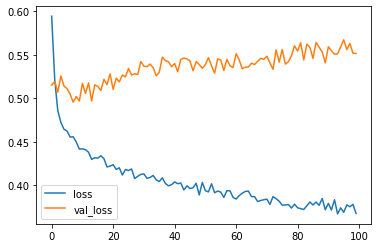

In [67]:
#check loss 
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

we can see that the model is overfit since validation loss keep getting higher

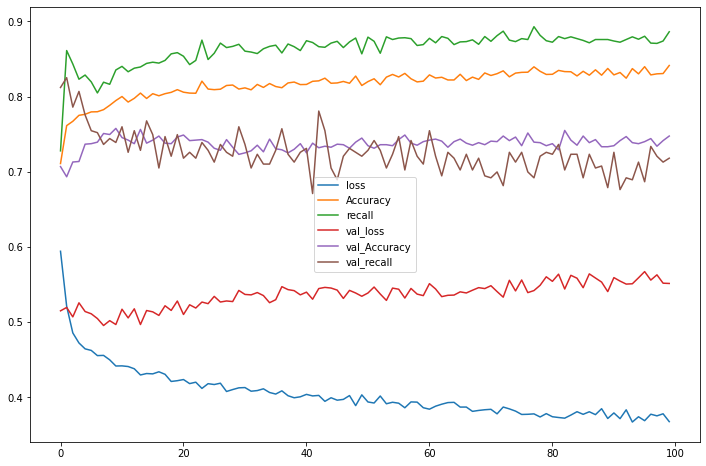

In [68]:
pd.DataFrame(history.history).plot(figsize=(12,8));

above model made without hidden layer and only output layer with 1 neuron. with 100 epoch the bigger the epoch gets the bigger accuracy we got for loss it got smaller every epoch, but those result does not represent the same in validation accuracy and loss both of parameter tend to stay at the same place not decreasing nor improving

#### Model Evaluation

In [69]:
#futher checking with predict
y_pred = model.predict(X_test_trf)
print('Predict result: \n', y_pred[:5])
print('\n y_test: \n', y_test[:5])

Predict result: 
 [[0.04778321]
 [0.16472517]
 [0.00146988]
 [0.03210864]
 [0.07791263]]

 y_test: 
 6359    0
5926    0
4743    0
4496    0
4569    1
Name: Churn, dtype: int64


In [70]:
#check y_pred if above 0.5 = 1 and below 0.5 = 0
predictions = []
for element in y_pred:
    if element > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

print(predictions[:5])

[0, 0, 0, 0, 0]


In [71]:
#checking top 10 data to check whether the prediction match actual data or not
pred_result_log = pd.DataFrame({
    "Actual":y_test,
    "Prediction":predictions
})
pred_result_log.head(10)

,Actual,Prediction
6359,0,0
5926,0,0
4743,0,0
4496,0,0
4569,1,0
4039,0,1
4558,1,1
6878,1,1
5522,1,1
4695,0,0


In [72]:
# show classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1549
           1       0.52      0.69      0.59       561

    accuracy                           0.75      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.75      0.76      2110



Text(69.0, 0.5, 'Truth')

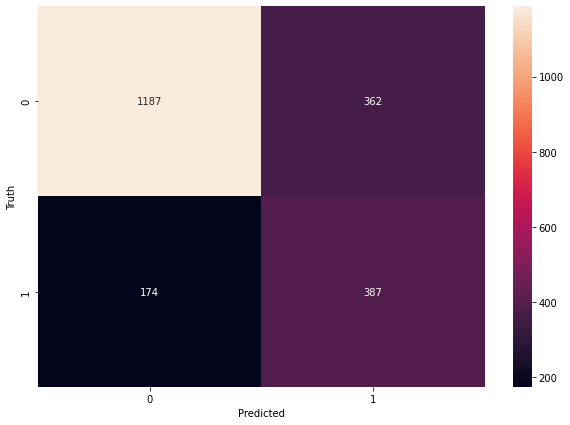

In [73]:
#check confusion matrix FP and FN
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model Improvement

In [74]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [75]:
# create model for hyperparameter tuning
def build_model(learning_rate=0.001, n_hidden=3, n_neurons=30, input_shape= X_train.shape[1:], initializer=initializers.GlorotNormal(), hidden_activation_func='relu'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu", kernel_initializer=initializer))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [76]:
model_cv = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [77]:
from tensorflow.keras.optimizers import Adam

In [78]:
# training sequential model
model_cv.fit(X_res, y_res, epochs=100,
             validation_data=(X_val_trf, y_val),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
158/158 [==============================] - 1s 5ms/step - loss: 0.5569 - accuracy: 0.7264 - val_loss: 0.5065 - val_accuracy: 0.7488
Epoch 2/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4843 - accuracy: 0.7651 - val_loss: 0.5461 - val_accuracy: 0.7238
Epoch 3/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4707 - accuracy: 0.7683 - val_loss: 0.5041 - val_accuracy: 0.7393
Epoch 4/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4620 - accuracy: 0.7796 - val_loss: 0.5069 - val_accuracy: 0.7380
Epoch 5/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.7853 - val_loss: 0.4861 - val_accuracy: 0.7529
Epoch 6/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4493 - accuracy: 0.7841 - val_loss: 0.4744 - val_accuracy: 0.7617
Epoch 7/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.7903 - val_loss: 0.5315 - val_accuracy: 0.7156

In [79]:
from tensorflow.keras import initializers

In [80]:
#make Parameters
import warnings 
warnings.filterwarnings('ignore')

params = {
    "n_hidden": [3, 4],
    "n_neurons": [20,30],
    'initializer':[initializers.GlorotNormal(), initializers.RandomNormal()],
    'learning_rate':[0.00001, 0.1]
}

#define gridsearch
grid_cv = GridSearchCV(model_cv, params, cv=5, verbose=2, n_jobs=-1)
grid_cv.fit(X_res, y_res, epochs=100,
            validation_data = (X_val_trf, y_val),
            callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Epoch 1/100
158/158 [==============================] - 1s 4ms/step - loss: 0.5553 - accuracy: 0.7161 - val_loss: 0.5071 - val_accuracy: 0.7278
Epoch 2/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4803 - accuracy: 0.7706 - val_loss: 0.5402 - val_accuracy: 0.7163
Epoch 3/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4640 - accuracy: 0.7776 - val_loss: 0.5098 - val_accuracy: 0.7319
Epoch 4/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4546 - accuracy: 0.7851 - val_loss: 0.5190 - val_accuracy: 0.7136
Epoch 5/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4466 - accuracy: 0.7865 - val_loss: 0.4836 - val_accuracy: 0.7529
Epoch 6/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4412 - accuracy: 0.7942 - val_loss: 0.4773 - val_accuracy: 0.7536
Epoch 7/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4326

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1dde82c590>,
             n_jobs=-1,
             param_grid={'initializer': [<keras.initializers.initializers_v2.GlorotNormal object at 0x7f1de0ba6cd0>,
                         'learning_rate': [1e-05, 0.1], 'n_hidden': [3, 4],
                         'n_neurons': [20, 30]},
             verbose=2)

In [81]:
#check best params and score
print('Grid Search Best score : ', grid_cv.best_score_)
print('Grid Search Best Parameters : ', grid_cv.best_params_)

Grid Search Best score :  0.7690476179122925
Grid Search Best Parameters :  {'initializer': <keras.initializers.initializers_v2.GlorotNormal object at 0x7f1de0ba6cd0>, 'learning_rate': 1e-05, 'n_hidden': 3, 'n_neurons': 30}


In [82]:
grid_cv.score(X_test_trf, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7403


0.7402843832969666

In [83]:
grid_cv.best_estimator_

In [84]:
#evaluate model
model_gridCV = grid_cv.best_estimator_.model

model_gridCV.evaluate(X_test_trf, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7403


[0.5404099822044373, 0.7402843832969666]

In [85]:
final_model = build_model(n_neurons=30, n_hidden=3, learning_rate=0.00001, initializer=initializers.RandomNormal())
final_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                810       
                                                                 
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [86]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [87]:
final_model_sq = ModelCheckpoint("model/final_model.h5", save_best_only=True)

In [88]:
#train final sequential model
final_model_history = final_model.fit(
    X_res, y_res, epochs=100,
    validation_data=(X_val_trf, y_val),
    callbacks=[final_model_sq, EarlyStopping(patience=20)]
).history

Epoch 1/100
158/158 [==============================] - 1s 4ms/step - loss: 0.5562 - accuracy: 0.7454 - val_loss: 0.5302 - val_accuracy: 0.7285
Epoch 2/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4895 - accuracy: 0.7685 - val_loss: 0.5671 - val_accuracy: 0.7007
Epoch 3/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4790 - accuracy: 0.7669 - val_loss: 0.5267 - val_accuracy: 0.7197
Epoch 4/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.7708 - val_loss: 0.5179 - val_accuracy: 0.7204
Epoch 5/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4693 - accuracy: 0.7714 - val_loss: 0.4761 - val_accuracy: 0.7576
Epoch 6/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.7710 - val_loss: 0.4763 - val_accuracy: 0.7583
Epoch 7/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.7760 - val_loss: 0.5489 - val_accuracy: 0.7048

In [89]:
#save history into dataframe
final_model_history_df = pd.DataFrame(final_model_history)

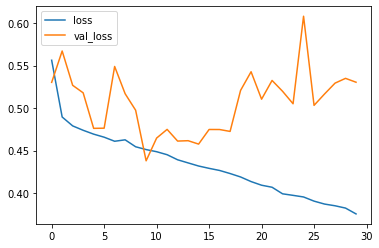

In [90]:
#show loss
final_model_history_df[['loss', 'val_loss']].plot();

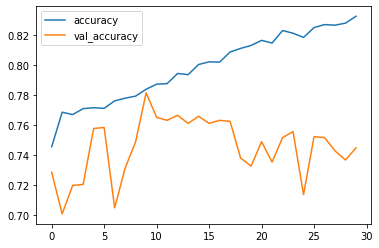

In [91]:
#show accuracy
final_model_history_df[["accuracy", "val_accuracy"]].plot();

### Model Evaluation

In [92]:

pred_grid = model_gridCV.predict(X_test_trf)
print('Predict result : \n', pred_grid[:5])
print('\n')
print('y_test : \n', y_test[:5])

predict_grid = []
for element in pred_grid:
    if element > 0.5:
        predict_grid.append(1)
    else:
        predict_grid.append(0)

print('\n',predict_grid[:5])

Predict result : 
 [[0.03618654]
 [0.22662579]
 [0.00741245]
 [0.01230626]
 [0.60799974]]


y_test : 
 6359    0
5926    0
4743    0
4496    0
4569    1
Name: Churn, dtype: int64

 [0, 0, 0, 0, 1]


In [93]:
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predict_grid)}")

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1549
           1       0.51      0.75      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.74      0.75      2110



Text(69.0, 0.5, 'Truth')

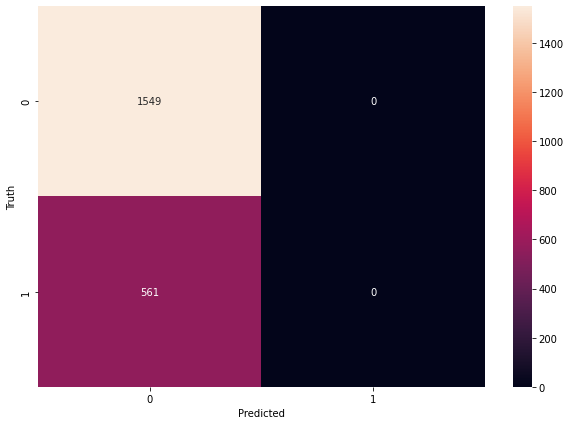

In [94]:
#confusion matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred_grid)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

after hyperparameter tuning, i still get overfit result with actual loss decreasing but validation loss is not decreasing 

# Functional API

In [95]:

from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Input 

# layers
data_in = Input(shape=X_res.shape[1:])
hidden1 = Dense(26,activation='relu')(data_in)
hidden2 = Dense(26, activation='relu')(hidden1)
concat = keras.layers.concatenate([data_in, hidden2])
output = keras.layers.Dense(1, activation="sigmoid")(concat)

#define model
model_func = Model(inputs=data_in, outputs=[output])

In [96]:
#model summary
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 26)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 26)           702         ['input_4[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 26)           702         ['dense_12[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 52)           0           ['input_4[0][0]',                
                                                                  'dense_13[0][0]']           

In [97]:
from keras.utils.vis_utils import plot_model

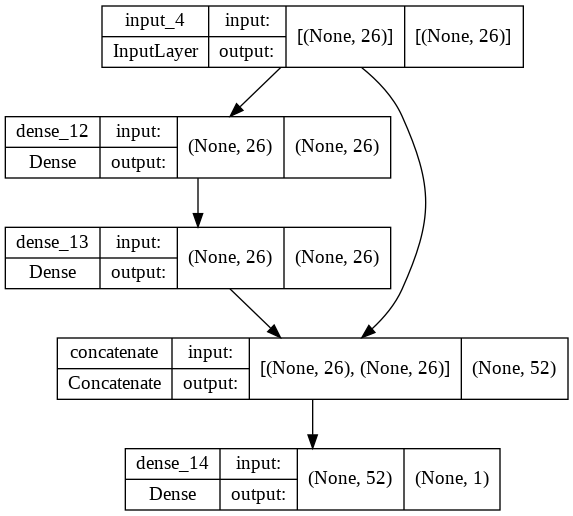

In [98]:
#see model archithecture
plot_model(model_func, "ANN_Functional_model.png", show_shapes=True)

In [99]:
#compile model
model_func.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [100]:
#train model
%time history = model_func.fit(X_res, y_res, epochs=100, validation_data=(X_val_trf, y_val))

Epoch 1/100
158/158 [==============================] - 1s 4ms/step - loss: 0.5756 - accuracy: 0.6901 - val_loss: 0.4928 - val_accuracy: 0.7522
Epoch 2/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4873 - accuracy: 0.7665 - val_loss: 0.5429 - val_accuracy: 0.7129
Epoch 3/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4764 - accuracy: 0.7718 - val_loss: 0.5314 - val_accuracy: 0.7211
Epoch 4/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4700 - accuracy: 0.7732 - val_loss: 0.5132 - val_accuracy: 0.7319
Epoch 5/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4650 - accuracy: 0.7742 - val_loss: 0.4790 - val_accuracy: 0.7427
Epoch 6/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4608 - accuracy: 0.7778 - val_loss: 0.4751 - val_accuracy: 0.7481
Epoch 7/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4557 - accuracy: 0.7808 - val_loss: 0.5217 - val_accuracy: 0.7244

In [101]:
#predict model
y_pred2 = model_func.predict(X_test_trf)
print('Predict result: \n', y_pred2[:5])
print('\n y_test: \n', y_test[:5])

Predict result: 
 [[0.02123352]
 [0.0123461 ]
 [0.0106592 ]
 [0.01238111]
 [0.07378219]]

 y_test: 
 6359    0
5926    0
4743    0
4496    0
4569    1
Name: Churn, dtype: int64


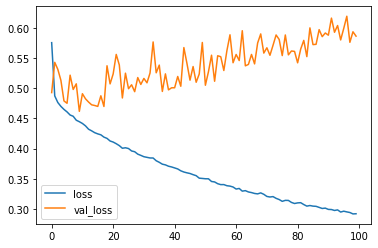

In [102]:
#show loss
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

the baseline model is still overfit using function method

In [103]:
#predictions
pred_funct = []
for element in y_pred2:
    if element > 0.5:
        pred_funct.append(1)
    else:
        pred_funct.append(0)

print(pred_funct[:5])

[0, 0, 0, 0, 0]


In [104]:
#insert predict result to dataframe
pred_result = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction":pred_funct
})
pred_result_log.head(10)

,Actual,Prediction
6359,0,0
5926,0,0
4743,0,0
4496,0,0
4569,1,0
4039,0,1
4558,1,1
6878,1,1
5522,1,1
4695,0,0


In [105]:
print(classification_report(y_test, pred_funct))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.54      0.65      0.59       561

    accuracy                           0.76      2110
   macro avg       0.70      0.73      0.71      2110
weighted avg       0.78      0.76      0.77      2110



f1 score for people who churn still low

In [106]:
print(f"ACCURACY SCORE  : {accuracy_score(y_test, pred_funct):.4f}\n")

ACCURACY SCORE  : 0.7602



accuracy score still below 80% which mean bad

Text(69.0, 0.5, 'Truth')

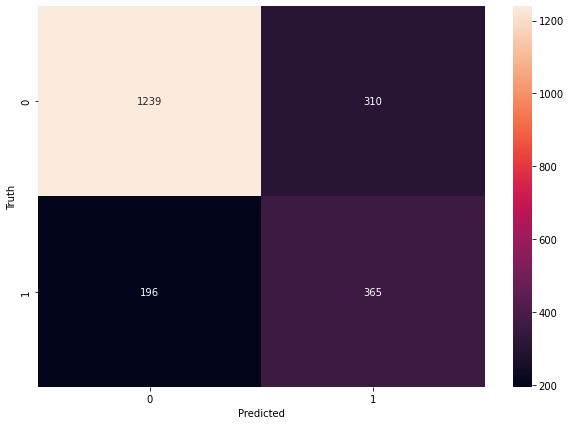

In [107]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred_funct)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model Improvement

In [108]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [109]:
def build_model_func(kernel, units):
    input_ = keras.layers.Input(shape=X_train.shape[1:])
    
    #Hidden Layer
    hidden1 = keras.layers.Dense(units=units, activation="relu", kernel_initializer=kernel)(input_)
    hidden2 = keras.layers.Dense(units=units, activation="relu", kernel_initializer=kernel)(hidden1)
    concat = keras.layers.concatenate([input_, hidden2])
    
    #Output Layer
    output = keras.layers.Dense(1, activation="sigmoid")(concat)
    
    model_func = keras.models.Model(inputs=[input_], outputs=[output])
    
    optimizer = tf.keras.optimizers.Adam()
    model_func.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model_func

In [110]:
model_cv = keras.wrappers.scikit_learn.KerasClassifier(build_model_func)


In [111]:
# model_cv.fit(X_res, y_res, epochs=100,
#              validation_data=(X_val_trf, y_val),
#              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [112]:
import warnings
warnings.filterwarnings('ignore')

params_dist= {
    'kernel':['random_uniform', 'random_normal'],
    'units':[30,40]
}

#searching process take 8 to 12 minutes to finish, please wait kindly :)
grid_cv_func = GridSearchCV(model_cv, params_dist, cv=5, verbose=2, n_jobs=-1)
grid_cv_func.fit(X_res, y_res, epochs=100,
            validation_data=(X_val_trf, y_val),
            callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/100
158/158 [==============================] - 1s 4ms/step - loss: 0.5885 - accuracy: 0.6647 - val_loss: 0.5229 - val_accuracy: 0.7420
Epoch 2/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4883 - accuracy: 0.7671 - val_loss: 0.5533 - val_accuracy: 0.7150
Epoch 3/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4805 - accuracy: 0.7663 - val_loss: 0.5172 - val_accuracy: 0.7319
Epoch 4/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4754 - accuracy: 0.7710 - val_loss: 0.5151 - val_accuracy: 0.7339
Epoch 5/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4716 - accuracy: 0.7708 - val_loss: 0.4793 - val_accuracy: 0.7542
Epoch 6/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4677 - accuracy: 0.7706 - val_loss: 0.4753 - val_accuracy: 0.7610
Epoch 7/100
158/158 [==============================] - 0s 3ms/step - loss: 0.4621 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1d46566a10>,
             n_jobs=-1,
             param_grid={'kernel': ['random_uniform', 'random_normal'],
                         'units': [30, 40]},
             verbose=2)

In [113]:
print('Grid Search Best score : ', grid_cv.best_score_)
print('Grid Search Best Parameters : ', grid_cv.best_params_)

Grid Search Best score :  0.7690476179122925
Grid Search Best Parameters :  {'initializer': <keras.initializers.initializers_v2.GlorotNormal object at 0x7f1de0ba6cd0>, 'learning_rate': 1e-05, 'n_hidden': 3, 'n_neurons': 30}


In [114]:
grid_cv.score(X_test_trf, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7403


0.7402843832969666

In [115]:
model_gridCV = grid_cv.best_estimator_.model

model_gridCV.evaluate(X_test_trf, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7403


[0.5404099822044373, 0.7402843832969666]

In [116]:
final_model_func = build_model(n_neurons=30, n_hidden=4, learning_rate=0.0001, initializer=initializers.RandomNormal())
final_model_func.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                810       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,631
Trainable params: 3,631
Non-trainable params: 0
_________________________________________________________________


In [117]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [118]:
final_model_fc = ModelCheckpoint("model/final_model_fc.h5", save_best_only=True)

In [119]:
final_model_history = final_model_func.fit(
    X_res, y_res, epochs=100,
    validation_data=(X_val_trf, y_val),
    callbacks=[final_model_fc, EarlyStopping(patience=20)]
).history

Epoch 1/100
158/158 [==============================] - 1s 5ms/step - loss: 0.5886 - accuracy: 0.6942 - val_loss: 0.5137 - val_accuracy: 0.7326
Epoch 2/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4908 - accuracy: 0.7681 - val_loss: 0.5831 - val_accuracy: 0.6811
Epoch 3/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4802 - accuracy: 0.7708 - val_loss: 0.5340 - val_accuracy: 0.7068
Epoch 4/100
158/158 [==============================] - 1s 3ms/step - loss: 0.4741 - accuracy: 0.7728 - val_loss: 0.5172 - val_accuracy: 0.7211
Epoch 5/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4674 - accuracy: 0.7758 - val_loss: 0.4726 - val_accuracy: 0.7529
Epoch 6/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4629 - accuracy: 0.7758 - val_loss: 0.4785 - val_accuracy: 0.7495
Epoch 7/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4555 - accuracy: 0.7815 - val_loss: 0.5406 - val_accuracy: 0.7062

In [120]:
final_model_history_df = pd.DataFrame(final_model_history)

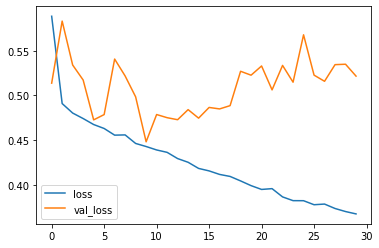

In [121]:
final_model_history_df[['loss', 'val_loss']].plot();

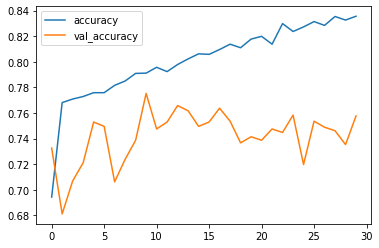

In [122]:
final_model_history_df[['accuracy', 'val_accuracy']].plot();

the accuracy and loss is great but validation chart is not the same, which mean kind of overfitting

# Model Inference

i will use sequential model since i got better result eventhough it's still overfit

In [123]:
new_data = [
    [77, 40, 9000, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
    [22, 50, 3000, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
]

In [125]:
new_data_trf = scaler_pipeline.fit_transform(new_data)

In [128]:
new_data_trf

array([[1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [130]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [132]:
results = np.where(final_model_sq > 0.5, 1, 0)

TypeError: ignored

still error on this process

In [ ]:
for i in range(len(results)):
    if results[i] == 1:
        print(f'Customer {i} have high tendency to churn.')
    else:
        print(f'Customer {i} have low tendency to churn.')

# Conclusion

EDA Analysis :
* Based on all numerical data, it's only totalcharges that skewed to the right, with assumption customer has high billing
* most people who use additional service most likely to churn because they are willing to spend money to those services 
* Target data is imbalance with 73,4% people not churn and the rest 26,6% churn
* most user are not senior citizen probably because internet and phone is way to advance for their age
* most people who use interservice fiberoptic are more likely to churn
* people who pay using electronic check more likely to churn

# Model Analysis :

## Sequential :
* model that i train after using parameter from gridsearch are overfit
* the model needs more parameter and probably trained with other kernel, or using pipeline
* baseline model and improved model both are overfit
* encode after spilliting the data
* percentage of people who churn in prediction is low, below 80% accuracy even after using new parameters
* parameters that i use are n_neuron 30, learning rate 0.00001 with kernel rand

## Functional :   
* have the same result as sequential, also overfit but show more extereme result
* use parameters 30 neuron, 0.00001 learning rate and GlorotNormal